# 선형 회귀

## 농어의 길이로 무게 예측하기

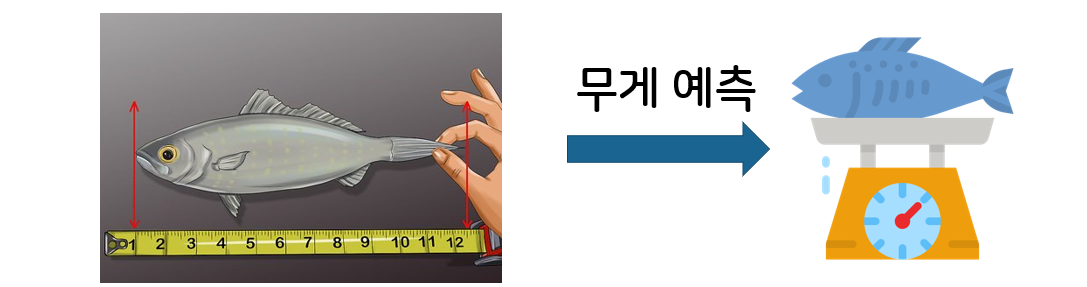

숫자를 바탕(연속형 데이터가 나오겠다고 예측해야함.)

In [31]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(#연속형 숫자임. ==> 회귀
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [32]:
# 판다스로 만들기
import pandas as pd

perch = pd.DataFrame({'길이' :perch_length,'무게' :perch_weight})


In [3]:
perch.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [7]:
perch.describe() #전처리 여부 혹은 모델 선정에 따른 전처리 필요성 의식

,길이,무게
count,56.000000,56.000000
mean,27.892857,382.239286
std,9.021668,347.617717
min,8.400000,5.900000
25%,21.825000,120.000000
50%,25.300000,207.500000
75%,36.625000,692.500000
max,44.000000,1100.000000


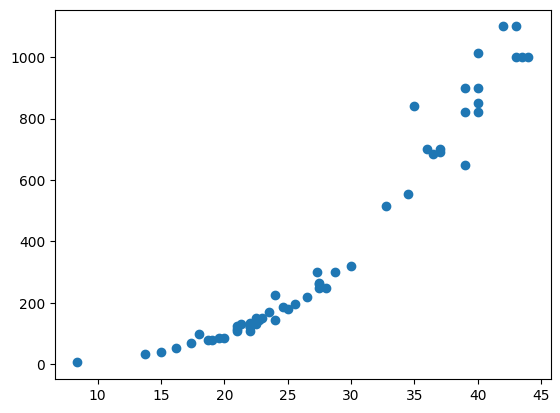

In [9]:
import matplotlib.pyplot as plt

# 훈련 세트의 산점도를 그립니다

plt.scatter(perch['길이'],perch['무게'])
plt.show()

## 데이터 세트 준비

In [10]:

from sklearn.model_selection import train_test_split

#데이터 분할

X_train,X_test,y_train,y_test = train_test_split(perch[['길이']],perch[['무게']],random_state=42,test_size=0.3)



## 모델 학습: 선형 회귀
대표적인 회귀 알고리즘이며, 비교적 성능이 뛰어나다.
선형이란 말처럼 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다. 이때 직선을 학습한다는 말은 특성을 가장 잘 나타낼 수 있는 기울기를 찾는다는 의미이다.  



In [138]:
#sklearn.linear_mode 패키지 아래에 선형회귀 알고리즘을 구현해놓은 클래스가 있음
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
# Linear Regression 학습/예측 

lr = LinearRegression().fit(X_train,y_train)

pred = lr.predict(X_test)


In [139]:
import warnings
warnings.filterwarnings('ignore') 
lr.score(X_test,y_test)
# 50cm 농어에 대한 예측
lr.predict([[50]])


array([[1245.42393074]])

----

In [13]:
#강사님코드

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
y_target = perch['무게']
X_data = perch.drop(['무게'],axis=1)
train_test_split(X_data,y_target,test_size=0.3,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,random_state=42,test_size=0.3)
#                                                                                                  소수의 데이터가 균일하게 들어갈 수 있도록 하는 파라미터/


In [14]:
lr = LinearRegression().fit(X_train,y_train)
preds = lr.predict(X_test)

import warnings
warnings.filterwarnings('ignore') 
# lr.score(y_test,pred)

# 50cm 농어에 대한 예측
lr.predict([[50]])# 똑같은 차원 == 2차원으로 만들어야함.

array([1245.42393074])

---

In [140]:
#lr객체에 coef_와 intercept_ 속성에 저장되어 있음


lr.coef_,lr.intercept_
# (array([[39.27726005]]), array([-718.43907189]))
# $y = 39.27*x - 718.43$


(array([[39.27726005]]), array([-718.43907189]))


**[농어 무게 예측 방정식]**

$y = 39.27*x - 718.43$

---

> * coef_는 기울기, intercept_를 절편이다.
> * 머신러닝에서는 기울기를 계수(coefficient) 또는 가중치(weight)라고 부른다.
> * 이는 머신러닝 알고리즘이 학습을 하고 찾은 값이라는 의미로 모델 파라미터라고 부른다. 
> * 많은 머신러닝 알고리즘의 훈련과정은 최적의 모델 파라미터를 찾는 것과 같다. 

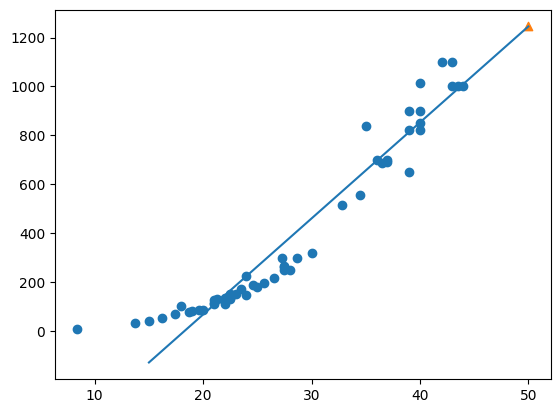

In [15]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(perch['길이'],perch['무게'])

plt.plot([15,50],[ 15 * lr.coef_ + lr.intercept_ , 50 * lr.coef_ + lr.intercept_]) # y(15) = x * 
plt.scatter(50,1245.42,marker='^')
plt.show()

훈련데이터 이외라도 측정가능하게됨. 

## 선형 회귀 평가

In [16]:
from sklearn.metrics import mean_squared_error , r2_score

#MSE : 에러들의 평균
mse = mean_squared_error(y_test,preds )

#RMSE : 에러들의 평균에다가 루트
rmse = np.sqrt(mse)

#R^2 : 실제와 예측의 분산비교
r2 = r2_score(  y_test , preds )

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2)) # variance score : 0.832 1 과 가까울수록 좋다

MSE : 15122.391 , RMSE : 122.973
Variance score : 0.832


In [17]:
# 훈련시 정확도
lr.score(X_train,y_train)


0.9371680443381393

In [18]:
# 테스트 정확도
lr.score(X_test,y_test)

0.8324765337629763

> * 훈련세트와 테스트세트 성능 점수가 10% 떨어짐. => 과적합이 발생했다 해석할 수 있다.

## 다항 회귀

농어의 길이와 무게에 대한 산점도를 좀더 반영하면 직선이 아닌 곡선이며, 이는 2차 방정식 그래프이다. 

2차방정식 그래프를 그리기 위해서는 길이를 제곱한 항이 훈련세트에 추가되어야 함을 의미한다. 

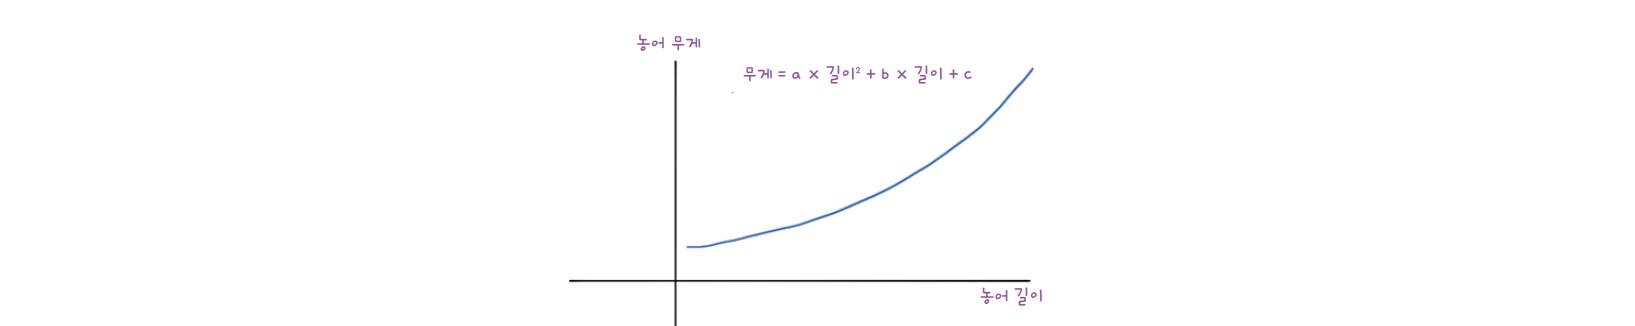

## 데이타 전처리

* PolynomialFeature()로 피처들을 다항으로 변환


* 1차 단항 피처들의 값 $[X_1,X_2] = [2,3]$일 경우
* 2차 다항 피처들의 값은 $[1,X_1,X_2,X_1^2,X_1X_2,X_2^2] = [1,2,3,4,6,9]$로 변환
* 3차 다항 피처들의 값은 $[1,X_1,X_2,X_1^2,X_1X_2,X_2^2,X_1^3,X_1^2X_2,X_1X_2^2,X_2^3] = [1,2,3,4,6,9,8,12,18,27]$로 변환

수집한데이터의 종류가 너무 작으면 다항으로 변경해 사용할 수 있다.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train)
poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('변환된 2차 다항식 계수 feature:\n', poly_train)

변환된 2차 다항식 계수 feature:
 [[  17.4   302.76]
 [  36.   1296.  ]
 [  25.    625.  ]
 [  40.   1600.  ]
 [  39.   1521.  ]
 [  43.   1849.  ]
 [  22.    484.  ]
 [  20.    400.  ]
 [  22.    484.  ]
 [  24.    576.  ]
 [  27.5   756.25]
 [  43.   1849.  ]
 [  40.   1600.  ]
 [  24.    576.  ]
 [  21.    441.  ]
 [  27.5   756.25]
 [  40.   1600.  ]
 [  32.8  1075.84]
 [  26.5   702.25]
 [  36.5  1332.25]
 [  13.7   187.69]
 [  22.7   515.29]
 [  15.    225.  ]
 [  37.   1369.  ]
 [  35.   1225.  ]
 [  28.7   823.69]
 [  23.5   552.25]
 [  39.   1521.  ]
 [  21.    441.  ]
 [  23.    529.  ]
 [  22.    484.  ]
 [  44.   1936.  ]
 [  22.5   506.25]
 [  19.    361.  ]
 [  37.   1369.  ]
 [  22.    484.  ]
 [  25.6   655.36]
 [  42.   1764.  ]
 [  34.5  1190.25]]


In [21]:
#특성이 어떻게 만들어 졌는지 이름 출력
poly.get_feature_names_out()

array(['길이', '길이^2'], dtype=object)

list

In [24]:

#학습
lr = LinearRegression().fit(poly_train,y_train)

preds = lr.predict(poly_test)
#예측
lr.predict([[50,50**2]])


array([1573.44693045])

In [23]:
# 50cm 농어에 대한 예측

poly.transform([[50]])# -- > 2차항으로 해얗ㅁ 전처리단계 그대로

array([[  50., 2500.]])

In [26]:
newdata = poly.transform([[50]])
lr.predict(newdata)

array([1573.44693045])

In [27]:
#회귀계수와 절편
lr.coef_, lr.intercept_

#(array([-21.29590996,   1.01075418]), 111.35697550346521)
        #x              x**2

(array([-21.29590996,   1.01075418]), 111.35697550346521)

---
**[농어 무게 예측 방정식]**

$ y = 1.01 * x^2 -21.6 *  x + 111.35$

---

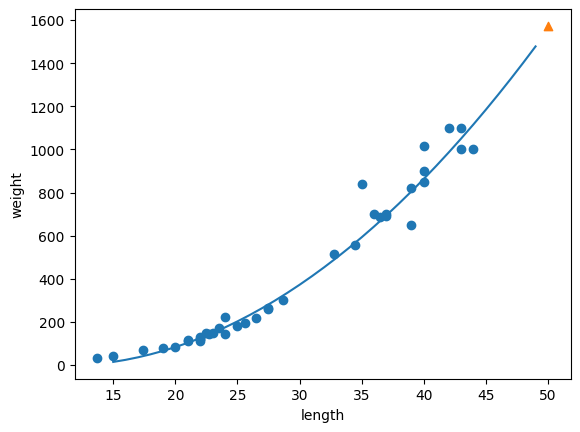

In [28]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter( X_train , y_train  )

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 111.35)

# 50cm 농어 데이터
plt.scatter([50], [1573], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

>  
> * 훈련세트의 경향을 잘 따르고 있고 무게가 음수로 나오는 일도 없다. 

In [29]:
from sklearn.metrics import mean_squared_error , r2_score

#MSE : 에러들의 평균
mse = mean_squared_error(y_test, preds)

#RMSE : 에러들의 평균에다가 루트
rmse = np.sqrt(mse)

#R^2 : 실제와 예측의 분산비교
r2 = r2_score(y_test, preds)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2))

MSE : 1867.769 , RMSE : 43.218
Variance score : 0.979


In [30]:
print(lr.score(poly_train, y_train))
print(lr.score(poly_test, y_test))

0.9689339489485594
0.9793091447729367


> * 훈련 세트와 테스트 세트에 대한 점수가 크게 높아졌다. 
> * 하지만 여전히 테스트 세트의 점수가 조금 더 높고, 과소적합이 아직 남아 있는 것 같다. 
> * 조금 더 복잡한 모델이 필요할 것 같다. 
>
> * '길이'라는 한 개의 특성(feature)로는 무게를 예측하는 데 한계가 있을 것이다. 
> * 무게와 연관이 있는 다른 특성들을 조사하여 데이터를 수집한 후 무게 예측 모델을 만들어 봐야 할 것 같다. 